# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mushawwir S.
- **Email:** mushawwir02@gmail.com
- **ID Dicoding:** mushawwir_s_vo9z

## Menentukan Pertanyaan Bisnis

- Bagaimana performa/tren peminjaman sepeda dalam setiap bulan?
- Apa pengaruh musim terhadap jumlah peminjaman sepeda?
- Apa pengaruh cuaca terhadap jumlah peminjaman sepeda?
- Bagaimana perbedaan pola peminjaman sepeda pada kategori ramai, sedang, dan sepi berdasarkan musim dan cuaca?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("Bike sharing dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- "day_df = pd.read_csv('day.csv')" berfungsi untuk mengambil/meload data pada file "day.csv".
- "day_df.head()" berfungsi untuk menampilkan 5 baris pertama pada file tersebut.

### Assessing Data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Pada data tersebut sudah tidak terdapat masalah pada jumlah data (sudah aman dari missing value). Namun, terdapat keganjalan pada tipe data dari kolom "dteday" yang bertipe data "object" harusnya bertipe data "datetime"

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- pada "day_df" tidak memiliki data yang sama yang ditunjukkan melalui output "Jumlah duplikasi:  0"

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- data pada "day_df" sudah aman tetapi terdapat sedikit keanehan terhadap nilai minimum yang terdapat pada kolom "hum" atau humidity/kelembapan pada udara yang mencapai 0, sedangkan kelembapan udara pada bumi hampir tidak mungkin mencapai 0.

### Cleaning Data

In [8]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

**Insight:**
- Mengubah tipe data kolom "dteday" menjadi tipe data "datetime"

In [9]:
day_df["year"] = day_df["dteday"].dt.year
day_df["month"] = day_df["dteday"].dt.month_name()

**Insight:**
- Menambahkan kolom "year" dan "month" dengan menggunakan kolom "dteday" yang telah diubah menjadi tipe data "datetime".

In [10]:
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
    ]
day_df["month"] = pd.Categorical(day_df["month"], categories=month_order, ordered=True)

**Insight:**
- Mengatur urutan bulan agar pada saat visualisasi data urutan bulannya mengikuti urutan Januari-Desember.

In [11]:
season_dict = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
    }
day_df["season_label"] = day_df["season"].map(season_dict)

**Insight:**
- Membuat variabel dengan nama "season_dict" yang bertipe data dictionary untuk menyimpan nilai label musim yang sesuai pada dataset yaitu 1 untuk musim "Spring", 2 untuk musim "Summer", 3 untuk musim "Fall", dan 4 untuk musim "Wimter".
- Membuat kolom baru dengan nama "season_label" untuk menyimpan label musim yang telah dikonversi dari nilai numerik pada kolom "season" menjadi string berdasarkan variabel "season_dict"

In [12]:
season_order = [
    "Spring",
    "Summer",
    "Fall",
    "Winter"
    ]
day_df["season_label"] = pd.Categorical(day_df["season_label"], categories=season_order, ordered=True)

**Insight:**
- Mengatur urutan musim agar memudahkan pada saat visualisasi data.

In [13]:
weather_dict = {
    1: "Clear",
    2: "Mist/Cloudy",
    3: "Light Snow/Rain",
    4: "Heavy Rain/Storm"  # jarang muncul
    }
day_df['weather_label'] = day_df['weathersit'].map(weather_dict)

**Insight:**
- Membuat variabel dengan nama "weather_dict" yang bertipe data dictionary untuk menyimpan nilai label cuaca yang sesuai pada dataset yaitu 1 untuk cuaca "Clear, etc", 2 untuk cuaca "Mist/Cloudy, etc", 3 untuk cuaca "Light Snow/Rain, etc", dan 4 untuk cuaca "Heavy Rain/Storm, etc".
- Membuat kolom baru dengan nama "weather_label" untuk menyimpan label cuaca yang telah dikonversi dari nilai numerik pada kolom "weathersit" menjadi string berdasarkan variabel "weather_dict"

## Exploratory Data Analysis (EDA)

In [14]:
monthly_trend = day_df.groupby(["year", "month"])["cnt"].sum().reset_index()

<ipython-input-14-457998c03a19>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trend = day_df.groupby(["year", "month"])["cnt"].sum().reset_index()


**Insight:**
- Membuat variabel "monthly_trend" yang berisi pengelompokan data berdasarkan tahun dan bulan, kemudian menghitung jumlah total peminjaman sepeda pada kolom "cnt" per kelompok.

In [15]:
monthly_trend["my_label"] = monthly_trend["month"].astype(str) + " " + monthly_trend["year"].astype(str)
monthly_trend = monthly_trend.sort_values(["year", "month"])

**Insight:**
- Membuat kolom baru dengan nama "my_label" yang berisi penggabungan nama bulan dan tahun yang ada pada variabel "monthly_trend" agar mudah untuk dibaca pada visualisasi data.
- Mengurutkan data tersebut berdasarkan tahun kemudian berdasarkan nama bulan.

In [16]:
print("\nPerforma/tren Jumlah Peminjaman Sepeda (Per Tahun/Bulan):")
print(monthly_trend[["my_label", "cnt"]])


Performa/tren Jumlah Peminjaman Sepeda (Per Tahun/Bulan):
          my_label     cnt
0     January 2011   38189
1    February 2011   48215
2       March 2011   64045
3       April 2011   94870
4         May 2011  135821
5        June 2011  143512
6        July 2011  141341
7      August 2011  136691
8   September 2011  127418
9     October 2011  123511
10   November 2011  102167
11   December 2011   87323
12    January 2012   96744
13   February 2012  103137
14      March 2012  164875
15      April 2012  174224
16        May 2012  195865
17       June 2012  202830
18       July 2012  203607
19     August 2012  214503
20  September 2012  218573
21    October 2012  198841
22   November 2012  152664
23   December 2012  123713


**Insight:**
- Menampilkan performa/tren peminjaman sepeda pada setiap bulan.

In [17]:
season_summary = day_df.groupby("season_label")["cnt"].agg([
    "mean", "sum", "count"
    ]).reset_index()

<ipython-input-17-7b8110e8040f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_summary = day_df.groupby("season_label")["cnt"].agg([


**Insight:**
- Membuat variabel dengan nama "season_summary" yang berisi pivot table atau menghitung rata-rata, jumlah, dan total peminjaman sepeda per musim.

In [18]:
print("\nRangkuman Peminjaman per Musim:")
print(season_summary)


Rangkuman Peminjaman per Musim:
  season_label         mean      sum  count
0       Spring  2604.132597   471348    181
1       Summer  4992.331522   918589    184
2         Fall  5644.303191  1061129    188
3       Winter  4728.162921   841613    178


**Insight:**
- Menampilkan isi dari variabel "season_summary" yang berisi rangkuman peminjaman sepeda per musim.

In [19]:
weather_summary = day_df.groupby("weather_label")["cnt"].agg([
    "mean", "sum", "count"
    ]).reset_index()

**Insight:**
- Membuat variabel dengan nama "weather_summary" yang berisi pivot table atau menghitung rata-rata, jumlah, dan total peminjaman sepeda berdasarkan cuaca.

In [20]:
print("\nRangkuman Peminjaman per Musim:")
print(weather_summary)


Rangkuman Peminjaman per Musim:
     weather_label         mean      sum  count
0            Clear  4876.786177  2257952    463
1  Light Snow/Rain  1803.285714    37869     21
2      Mist/Cloudy  4035.862348   996858    247


**Insight:**
- Menampilkan isi dari variabel "weather_summary" yang berisi rangkuman peminjaman sepeda berdasarkan cuaca.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa/tren peminjaman sepeda dalam setiap bulan?

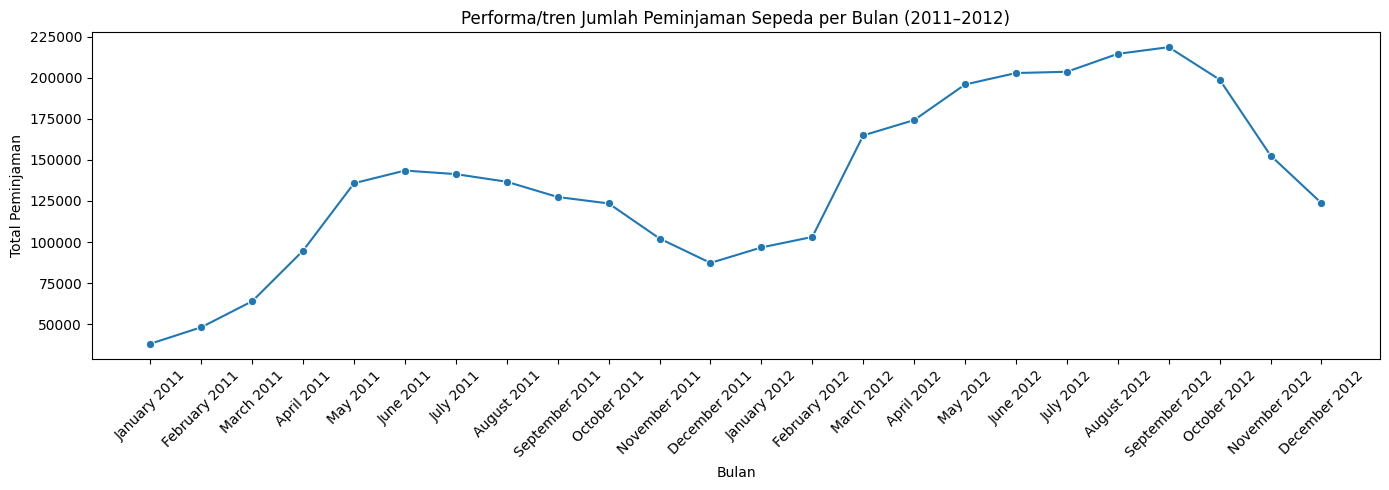

In [21]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_trend, x="my_label", y="cnt", marker="o")
plt.title("Performa/tren Jumlah Peminjaman Sepeda per Bulan (2011–2012)")
plt.xlabel("Bulan")
plt.ylabel("Total Peminjaman")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Performa peminjaman sepeda pada bulan Januari 2011 terus meningkat sampai pada bulan Mei 2011, dan konsisten sampai pada bulan September 2011 dan kembali menurun sedikit sampai pada bulan Desember.
- Performa/tren peminjaman sepeda pada tahun 2012 juga sama pada performa peminjaman sepeda di tahun 2011 yang menandakan adanya pola musiman yang konsisten.
- Peminjaman sepeda tertinggi pada setiap tahun berada pada bulan Mei, Juni, Juli, dan Agustus (Musim Panas dan Gugur). Peminjaman sepeda terendah berada pada musim dingin.
- Total peminjaman sepeda pada tahun 2012 lebih tinggi daripada tahun 2011 hampir di seluruh bulan yang menandakan adanya pertumbuhan penggunaan layanan peminjaman sepeda dari tahun ke tahun.

### Pertanyaan 2: Apa pengaruh musim terhadap jumlah peminjaman sepeda?

<ipython-input-22-cc3c299cddd2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df, x="season_label", y="cnt", palette="Set3")


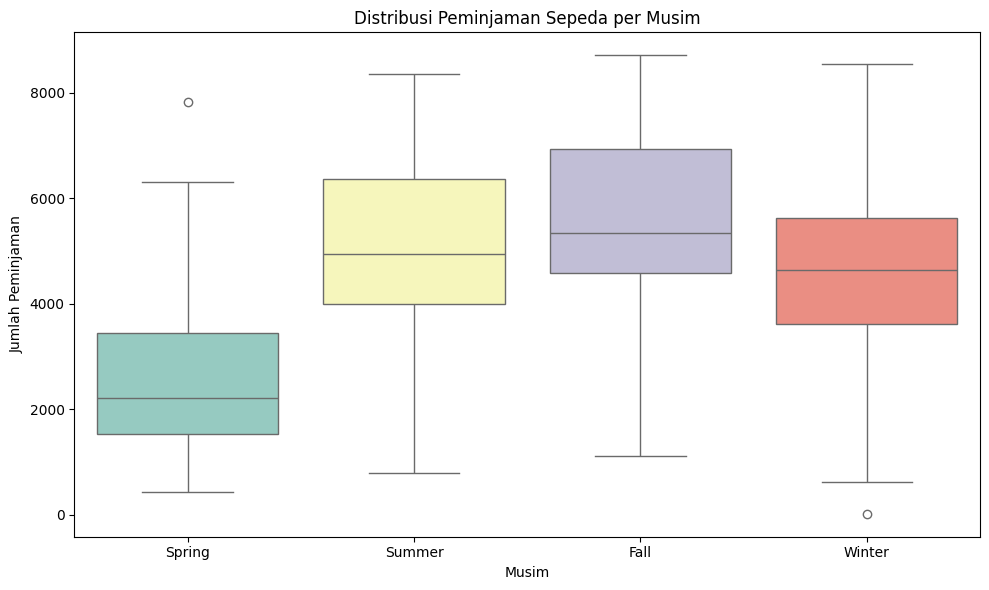

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x="season_label", y="cnt", palette="Set3")
plt.title("Distribusi Peminjaman Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.tight_layout()
plt.show()

**Insight:**
- Aktivitas peminjaman sepeda tertinggi dan stabil berada pada saat Musim Gugur (Fall).
- Peminjaman sepeda pada saat musim Spring dan Winter cenderung lebih sepi, yang kemungkinan besar dipengaruhi oleh cuaca yang kurang ideal.
- Peminjaman sepeda pada musim Summer memiliki aktivitas yang tinggi, namun dengan fluktuasi besar yang kemungkinan karena faktor libur atau cuaca yang ekstrim.




<ipython-input-24-721de2258ca0>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=season_summary, x="season_label", y="mean", ci=None, palette="Set2")
<ipython-input-24-721de2258ca0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_summary, x="season_label", y="mean", ci=None, palette="Set2")


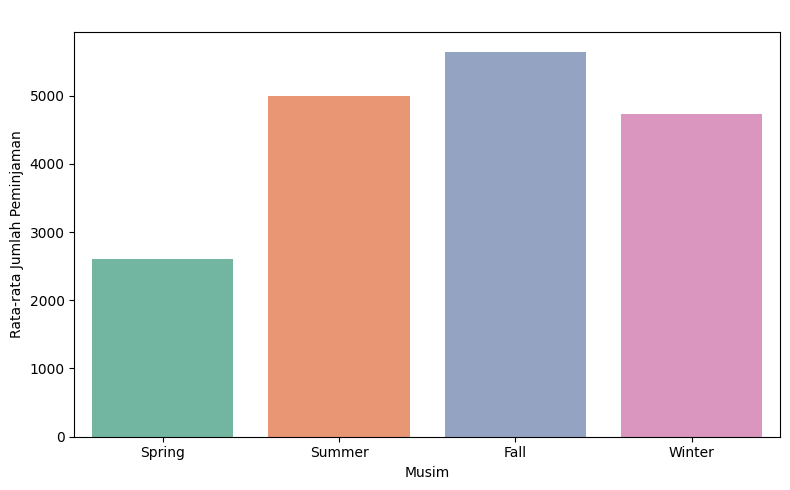

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(data=season_summary, x="season_label", y="mean", ci=None, palette="Set2")
plt.title(" ")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.tight_layout()
plt.show()

**Insight:**
- Rata-rata peminjaman sepeda tertinggi berada pada saat musim Fall dan Summer, dan cenderung lebih rendah pada saat musim Spring dan Winter.

### Pertanyaan 3: Apa pengaruh cuaca terhadap jumlah peminjaman sepeda?

<ipython-input-25-1f778d9dbe23>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df, x="weather_label", y="cnt", palette="Set3")


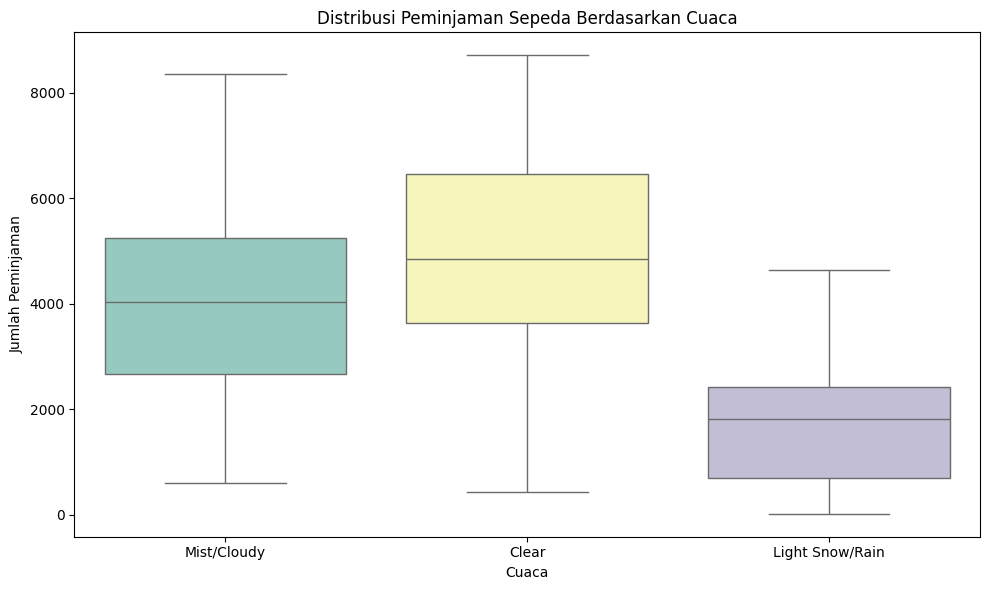

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x="weather_label", y="cnt", palette="Set3")
plt.title("Distribusi Peminjaman Sepeda Berdasarkan Cuaca")
plt.xlabel("Cuaca")
plt.ylabel("Jumlah Peminjaman")
plt.tight_layout()
plt.show()

**Insight:**
- Kondisi cuaca sangat mempengaruhi aktivitas peminjaman sepeda.
- Jumlah peminjama sepeda tertinggi pada saat cuaca Clear (Cerah), pada saat cuaca Mist/Cloudy (Berkabut/Berawan) jumlah peminjaman sepeda ada namun tidak banyak, dan jumlah peminjaman sepeda terendah pada saat cuaca Light Snow/Rain (Salju/ hujan).

<ipython-input-26-8e418355707c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=weather_summary, x="weather_label", y="mean", ci=None, palette="Set2")
<ipython-input-26-8e418355707c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_summary, x="weather_label", y="mean", ci=None, palette="Set2")


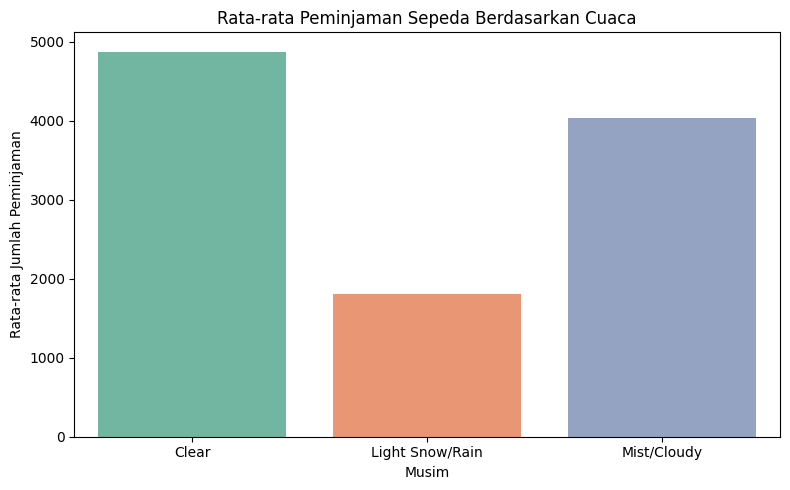

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(data=weather_summary, x="weather_label", y="mean", ci=None, palette="Set2")
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Cuaca")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.tight_layout()
plt.show()

**Insight:**
- Semakin baik keadaan cuaca, semakin tinggi rata-rata peminjaman sepeda.

## Analisis Lanjutan (Opsional)

In [27]:
def manual_cluster(row):
    if row["cnt"] >= 6000:
        return "Ramai"
    elif 3000 <= row["cnt"] < 6000:
        return "Sedang"
    else:
        return "Sepi"

day_df["volume_cluster"] = day_df.apply(manual_cluster, axis=1)

**Insight:**
- Membuat fungsi baru bernama "manual_cluster" untuk melakukan klasterisasi manual terhadap jumlah peminjaman sepeda (kolom "cnt") yang terdiri dari 3 kategori yaitu: "Ramai", "Sedang", dan "Sepi".
- Fungsi tersebut dipanggil untuk diterapkan pada semua data yang berada pada kolom "cnt" kemudian hasilnya akan disimpan pada kolom baru yang bernama "volume_cluster".

In [28]:
print("\nJumlah hari per cluster volume:")
print(day_df["volume_cluster"].value_counts())


Jumlah hari per cluster volume:
volume_cluster
Sedang    379
Ramai     180
Sepi      172
Name: count, dtype: int64


**Insight:**
- Mencetak jumlah dari masing-masing kategori yang berada pada kolom "volume_cluster"

### Pertanyaan 4: Bagaimana perbedaan pola peminjaman sepeda pada kategori ramai, sedang, dan sepi berdasarkan musim dan cuaca?

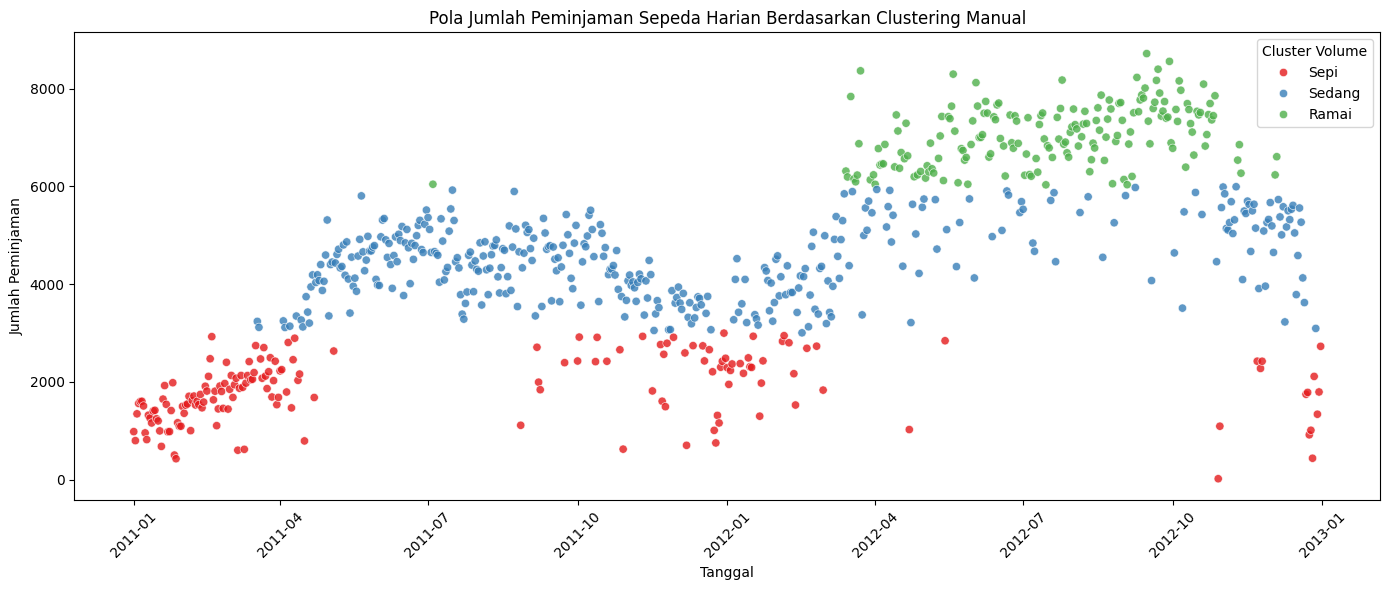

In [29]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=day_df, x="dteday", y="cnt", hue="volume_cluster", palette="Set1", alpha=0.8)
plt.title("Pola Jumlah Peminjaman Sepeda Harian Berdasarkan Clustering Manual")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(rotation=45)
plt.legend(title="Cluster Volume")
plt.tight_layout()
plt.show()

**Insight:**
- Terlihat tren peningkatan jumlah peminjaman sepeda dari ala tahun 2011 hingga akhir tahun 2012.
- Pada awal tahun 2011, sebagian besar titik berada pada cluster "sepi", cluster "sedang" berada pada pertengahan tahun 2011 sampai 2012, dan pada saat memasuki tahun 2012 cluster "ramai" mulai mendominasi dengan jumlah peminjaman harian yang tinggi mencapai lebih dari 8000 peminjaman sepeda per hari.

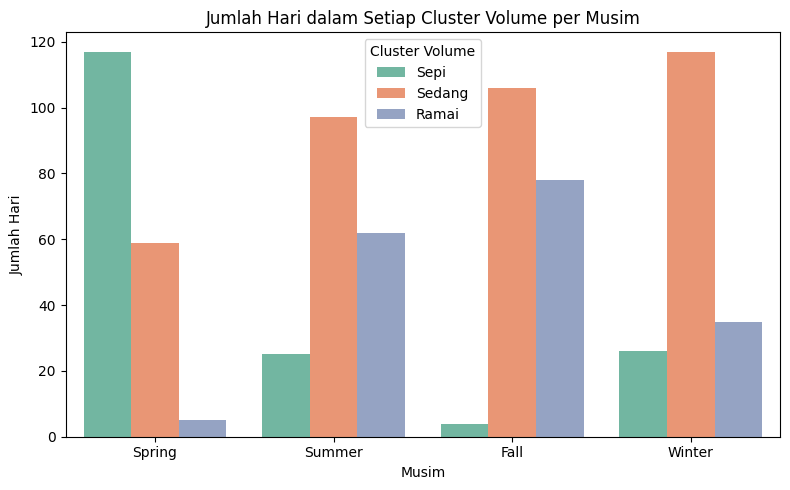

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(data=day_df, x='season_label', hue='volume_cluster', palette='Set2')
plt.title("Jumlah Hari dalam Setiap Cluster Volume per Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Hari")
plt.legend(title="Cluster Volume")
plt.tight_layout()
plt.show()

**Insight:**
- Jumlah hari pada saat Spring (Musim Semi) Kebanyakan sepi, namun ada beberapa hari dimana permintaan peminjaman sepeda sedang dan ramai.
- Hari-hari pada saat Summer (musim panas), Fall (musim gugur), dan winter (musim Dingin) kebanyakan permintaan sepeda berada pada kategori sedang dan ramai.


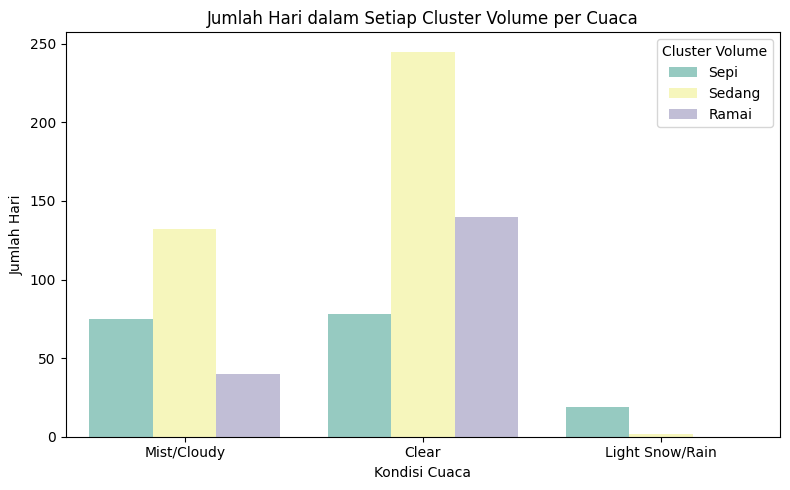

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(data=day_df, x='weather_label', hue='volume_cluster', palette='Set3')
plt.title("Jumlah Hari dalam Setiap Cluster Volume per Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Hari")
plt.legend(title="Cluster Volume")
plt.tight_layout()
plt.show()


**Insight:**
- Permintaan sepeda tinggi pada saat cuaca Clear dan jarang orang meminjam sepeda pada saat cuaca Light Snow/rain

## Conclusion

- Conclution pertanyaan 1:
Performa peminjaman sepeda pada bulan Januari 2011 terus meningkat sampai pada bulan Mei 2011, dan konsisten sampai pada bulan September 2011 dan kembali menurun sedikit sampai pada bulan Desember. Total peminjaman sepeda pada tahun 2012 lebih tinggi daripada tahun 2011 hampir di seluruh bulan yang menandakan adanya pertumbuhan penggunaan layanan peminjaman sepeda dari tahun ke tahun.

- Conclution pertanyaan 2:
Aktivitas peminjaman sepeda tertinggi dan stabil berada pada saat Musim Gugur (Fall). Peminjaman sepeda pada saat musim Spring dan Winter cenderung lebih sepi, yang kemungkinan besar dipengaruhi oleh cuaca yang kurang ideal. Peminjaman sepeda pada musim Summer memiliki aktivitas yang tinggi, namun dengan fluktuasi besar yang kemungkinan karena faktor libur atau cuaca yang ekstrim.

- Conclution pertanyaan 3:
Kondisi cuaca sangat mempengaruhi aktivitas peminjaman sepeda. Jumlah peminjama sepeda tertinggi pada saat cuaca Clear (Cerah), pada saat cuaca Mist/Cloudy (Berkabut/Berawan) jumlah peminjaman sepeda ada namun tidak banyak, dan jumlah peminjaman sepeda terendah pada saat cuaca Light Snow/Rain (Salju/ hujan).

- Conclution pertanyaan 4:
Terlihat tren peningkatan jumlah peminjaman sepeda dari ala tahun 2011 hingga akhir tahun 2012. Pada awal tahun 2011, sebagian besar titik berada pada cluster "sepi", cluster "sedang" berada pada pertengahan tahun 2011 sampai 2012, dan pada saat memasuki tahun 2012 cluster "ramai" mulai mendominasi dengan jumlah peminjaman harian yang tinggi mencapai lebih dari 8000 peminjaman sepeda per hari.

In [32]:
day_df.to_csv("all_data.csv", index=False)